In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import csv

In [64]:
# choose your file
vec_size = 128
df = pd.read_csv('med'+str(vec_size)+'.csv')
feat_cols = ['x_'+str(i) for i in range(vec_size)]

In [65]:
df

,type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,LU32PEEng,0.206915,0.074149,-0.859611,0.258039,0.127314,0.385063,0.213141,-0.356258,1.091893,...,1.614738,-0.107325,0.056426,-1.855952,-0.327527,-1.483451,-0.614619,-1.271079,-0.443799,0.899730
1,LU64PEEng,0.298494,0.453191,-0.486118,0.317496,0.306372,0.516771,0.376347,-0.350897,1.018797,...,1.703879,0.104438,0.074724,-1.157997,-0.179936,-1.549980,-0.530621,-0.986846,-0.550644,0.973920
2,adder,-2.843029,-0.361151,-0.674308,0.283127,1.994801,1.697362,-0.302919,-1.575962,0.318983,...,-0.194889,-0.145945,-0.465528,-1.314829,0.280743,0.020322,0.411928,-0.252144,0.078435,1.132915
3,arbiter,-1.887432,0.696038,-0.685138,1.829185,1.625201,1.905173,0.924091,-1.203556,0.156406,...,1.220166,0.273476,-0.813995,-1.118703,-0.750689,-0.933455,0.808851,-1.192585,-0.715937,0.136072
4,arm_core,-1.036102,-0.037148,-0.874629,0.900715,0.395698,0.788732,-1.110139,-0.554410,0.046790,...,0.407271,0.694347,0.034570,-0.491703,0.761936,-0.518993,0.119950,-0.492357,-0.186562,0.429815
5,bar,-0.675994,0.372737,-2.362316,1.582646,0.645093,1.084576,-0.726486,-0.980231,0.415667,...,1.005644,0.207460,-0.956906,-1.640125,0.042161,-1.020618,-0.128918,-0.287897,-0.330813,0.076186
6,bgm,-0.704557,0.096891,-0.701722,0.337782,0.010879,0.406211,-0.478268,-1.369502,-0.137961,...,0.217930,0.457654,0.034549,-0.348297,0.574051,-1.533724,0.555107,-0.645551,-0.652448,1.120808
7,blob_merge,-1.898561,-0.157000,-0.724019,0.774100,1.692513,1.049397,-1.078998,0.064290,0.074851,...,0.642517,0.119399,0.201234,-1.067523,0.311663,-1.050732,-0.453577,-1.001608,-0.422928,0.459046
8,boundtop,-0.299735,1.460495,-1.834715,-0.070306,-0.040600,-0.238981,-0.340663,-1.259215,-0.056844,...,0.770465,1.217579,0.293264,-0.154106,1.257602,-0.997390,0.144564,-0.667771,0.125278,1.196538
9,cavlc,-0.289322,-0.027718,-0.204233,0.211788,0.272369,0.132757,-0.171408,0.003257,0.007885,...,0.348210,0.101749,0.330534,-0.169228,0.141098,-0.629290,-0.109281,-0.485359,-0.435221,0.695401


In [11]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

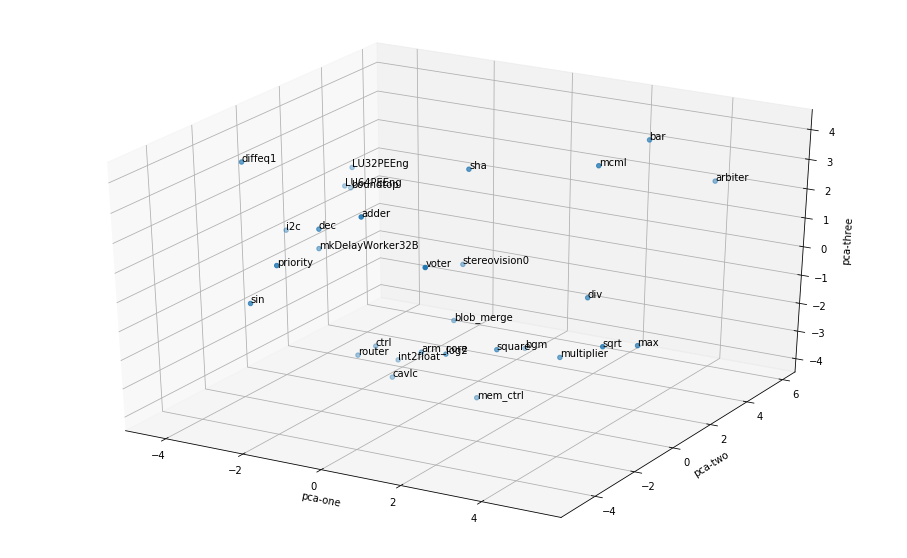

In [59]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
for i, label in enumerate(df['type']):
#     print(i, label)
#     print(label, (df['pca-one'][i], df['pca-two'][i], df['pca-three'][i]))
     ax.text(df['pca-one'][i], df['pca-two'][i], df['pca-three'][i], s=label)
plt.show()

In [90]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
prepca = True
if vec_size > 30 & prepca:
    pca_30 = PCA(n_components=30)
    pca_result_30 = pca_30.fit_transform(df[feat_cols].values)
    tsne_results = tsne.fit_transform(pca_result_30)
else: 
    tsne_results = tsne.fit_transform(df[feat_cols].values)

[t-SNE] Computing 29 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.001s...
[t-SNE] Computed neighbors for 30 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.711735
[t-SNE] KL divergence after 300 iterations: 1.643074
we got here


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [36]:
# 2d tsne plot, change n_components in TSNE function to 2
# df['tsne-2d-one'] = tsne_results[:,0]
# df['tsne-2d-two'] = tsne_results[:,1]
# plt.figure(figsize=(16,10))
# ax = sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
#     data=df,
#     legend="full",
#     alpha=0.3
# )

# for i, label in enumerate(df['type']):
#      ax.text(df['tsne-2d-one'][i], df['tsne-2d-two'][i],s=label)
# plt.show()

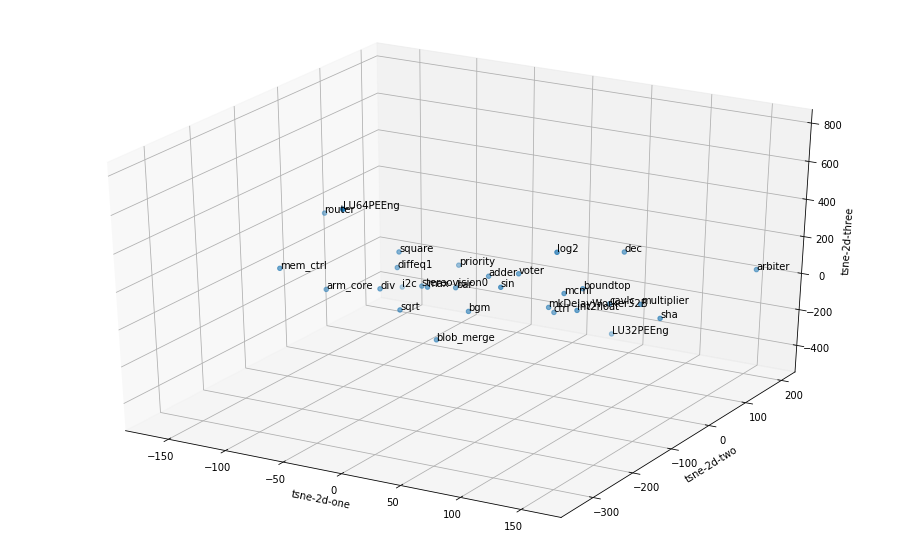

In [91]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
df['tsne-2d-three'] = tsne_results[:,2]
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["tsne-2d-one"], ys=df["tsne-2d-two"],
    zs=df["tsne-2d-three"]
)
ax.set_xlabel('tsne-2d-one')
ax.set_ylabel('tsne-2d-two')
ax.set_zlabel('tsne-2d-three')

for i, label in enumerate(df['type']):
     ax.text(df['tsne-2d-one'][i], df['tsne-2d-two'][i], df['tsne-2d-three'][i],s=label)
plt.show()